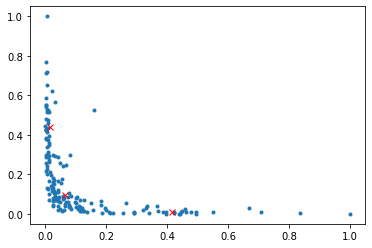

In [23]:
import copy
import numpy as np
import time
from matplotlib import pyplot as plt
import pandas as pd
import random
import math
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
np.set_printoptions(suppress=True)
df=pd.read_csv('C:\Python\Assignments\MLAssignment\Country_data.csv')
df.set_index("country",
              inplace = True)
dfcopy=copy.deepcopy(df)
RS=MinMaxScaler()
for x in df.columns[0:9]:
    RS.fit(np.array(df[x]).reshape(-1,1))
    df[x]=RS.transform(np.array(df[x]).reshape(-1,1))
    df[x].round(2)
km=KMeans(n_clusters=3)
a=km.fit_predict(df)
dfcopy['status']=a
clusters=km.cluster_centers_
plt.plot(df['gdpp'],df['child_mort'],'.')
plt.plot(clusters[:,8],clusters[:,0],'rx')
plt.show()



In [15]:
dfcopy[dfcopy['status']==1]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,status
country,,,,,,,,,,
Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1
Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,1
Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,1
Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,1
Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,1
Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,1
Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,1
Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,1
